In [7]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

## Preparation

In [8]:
# Load in datasets
# Conversation information
df = pd.read_csv('ALL_CONVERSATIONS_WRANGLED.csv')
print('Conversation information:')
#display(df.head())

# Database
conn = sqlite3.connect('full_conversation_database.db')
conv_df = pd.read_sql('SELECT * FROM tweets', conn)
print('Conversation database: ')
#display(conv_df.head())

Conversation information:


DatabaseError: Execution failed on sql 'SELECT * FROM tweets': no such table: tweets

## EDA

In [3]:
df['conversation_length'].value_counts().sort_index()

2     316059
3      72506
4      27504
5       7603
6       3195
7       1011
8        448
9        150
10        76
11        40
12        17
13         4
14         1
15         6
16         3
17         1
19         1
20         2
Name: conversation_length, dtype: int64

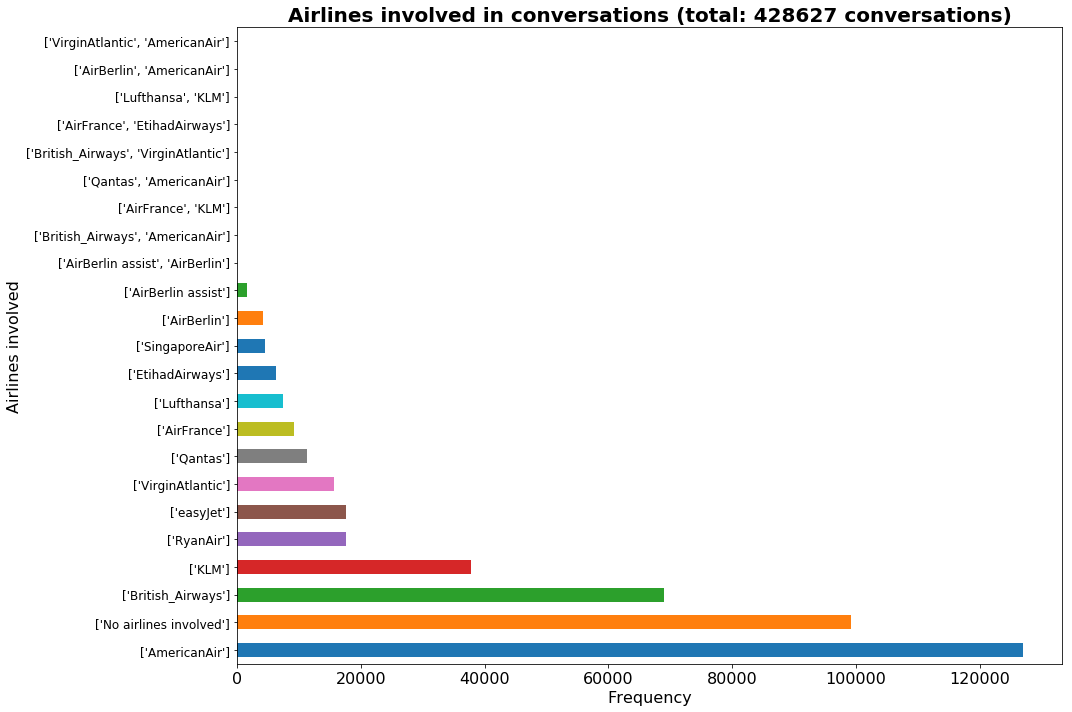

In [12]:
df['airlines_involved'].value_counts().plot(kind='barh', figsize=(15,10))
plt.title(f'Airlines involved in conversations (total: {len(df)} conversations)', weight='bold', fontsize=20)
plt.xlabel('Frequency', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.ylabel('Airlines involved', fontsize=16)
plt.savefig('airline_involvement_in_conversations', dpi=300)

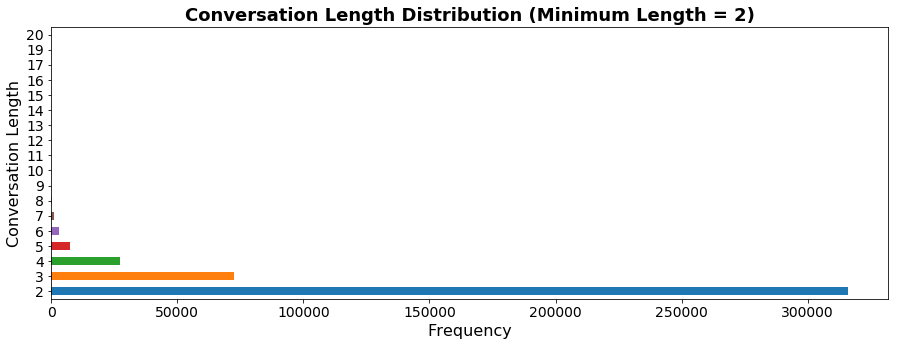

In [21]:
df['conversation_length'].value_counts().sort_index().plot(kind='barh', figsize=(15,5))
plt.title('Conversation Length Distribution (Minimum Length = 2)', weight='bold', fontsize=18);
plt.xlabel('Frequency', fontsize=16)
plt.ylabel('Conversation Length', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('conversation_length_distribution', dpi=300)

## Check long conversations

In [68]:
long_conv = df[df['conversation_length'] == 20]

In [72]:
long_conv_user_ids = eval(long_conv['user_ids'].values[1])
long_conv_tweet_ids = eval(long_conv['tweet_ids'].values[1])

In [74]:
long_conv.head()

,conversation_id,raw_tweets_info,conversation_length,tweet_ids,user_ids,airlines_involved
192752,458417,"[(781120814590681088, 242747093), (78112054383...",20,"[781108878918426624, 781110422476824576, 78111...","[242747093, 242747093, 242747093, 242747093, 2...",['No airlines involved']
293673,719667,"[(800121958197329920, 42341428), (800107205894...",20,"[799981590357114880, 799985021129986048, 80001...","[42341428, 22536055, 42341428, 22536055, 42341...",['AmericanAir']


In [76]:
long_conv_text = conv_df[conv_df['id_str'].isin([str(tweet) for tweet in long_conv_tweet_ids])]['text'].values
print('Example conversation:')
i = 1
for tweet in long_conv_text:
    print(f'Tweet {i}: {tweet}')
    i+=1

Example conversation:
Tweet 1: @AmericanAir you've been saying the same since yesterday and nothing.
Tweet 2: @cdroppe We've sent additional emails to our airport Baggage teams on your behalf, and we'll let you know as soon as we hear from them.
Tweet 3: @AmericanAir still no news.
Tweet 4: @cdroppe Once we get a response from our bag team someone will contact you directly.
Tweet 5: @AmericanAir still waiting...
Tweet 6: @cdroppe Our apologies for the wait. We're still waiting as well for an update.
Tweet 7: @AmericanAir still nothing. I keep calling and still nobody seems to know whether it is in Miami or Houston... And you tell me to wait.
Tweet 8: @AmericanAir when can I get a straight answer? I can't believe it takes so long.
Tweet 9: @AmericanAir how can a company of your size doesn't know where you placed a piece of luggage!
Tweet 10: @cdroppe The bag was forwarded on AA38, connecting to AA957 last night, on expedite tag 822277. The bag should have arrived at 8:29a.
Tweet 11: @Am